# Chicago Crime Data Analysis
* Project Group: Christopher Habib, Siddharth Krishnan, Ali Kashani, Elmaddin Karimov
* Created on: March , 2019
* Description: Data exploration and data visualization on Chicago crime dataset from 2001 to present
* Curated dataset: https://dev.socrata.com/foundry/data.cityofchicago.org/6zsd-86xi

In [1]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')

### View subset of data

In [3]:
## Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4381932,HL677807,10/16/2005 09:30:00 PM,051XX S MENARD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,23.0,56.0,14,1138567.0,1869950.0,2005,02/28/2018 03:56:25 PM,41.799263,-87.767377,"(41.799263181, -87.767376862)"
1,6833055,HR241329,03/28/2009 11:30:00 PM,034XX W PARKER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,35.0,22.0,08B,1152927.0,1918074.0,2009,02/28/2018 03:56:25 PM,41.931049,-87.713440,"(41.931049328, -87.713440154)"
2,6833057,HR215483,03/14/2009 01:20:00 PM,072XX S HERMITAGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,17.0,67.0,08B,1165933.0,1856730.0,2009,02/28/2018 03:56:25 PM,41.762448,-87.667394,"(41.762447541, -87.667393762)"
3,6833058,HR241426,03/28/2009 11:00:00 PM,036XX N RAVENSWOOD AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,47.0,6.0,06,1163715.0,1924205.0,2009,02/28/2018 03:56:25 PM,41.947652,-87.673623,"(41.947652256, -87.673622996)"
4,6833059,HR241429,03/28/2009 03:00:00 AM,012XX W LOYOLA AVE,0890,THEFT,FROM BUILDING,COLLEGE/UNIVERSITY RESIDENCE HALL,False,False,...,40.0,1.0,06,1166780.0,1943821.0,2009,02/28/2018 03:56:25 PM,42.001414,-87.661792,"(42.001413896, -87.661791623)"


In [4]:
## Print last 5 lines of dataset
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6817163,6833048,HR241404,03/28/2009 06:00:00 PM,020XX N WOOD ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,22.0,05,1164027.0,1913546.0,2009,02/28/2018 03:56:25 PM,41.918397,-87.672778,"(41.91839675, -87.672778029)"
6817164,6833050,HR241211,03/29/2009 08:50:00 AM,013XX W RANDOLPH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,27.0,28.0,06,1167246.0,1901101.0,2009,02/28/2018 03:56:25 PM,41.884178,-87.661309,"(41.884178197, -87.661309404)"
6817165,6833051,HR241299,03/29/2009 11:30:00 AM,036XX W 64TH PL,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,13.0,65.0,18,1153158.0,1861594.0,2009,02/28/2018 03:56:25 PM,41.776057,-87.714088,"(41.776056982, -87.714088067)"
6817166,6833053,HR239930,03/22/2009 12:00:00 PM,022XX W NORTH AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,1.0,24.0,05,1161267.0,1910605.0,2009,02/28/2018 03:56:25 PM,41.910384,-87.683000,"(41.910384321, -87.683000406)"
6817167,6833054,HR241201,03/29/2009 10:30:00 AM,019XX N MILWAUKEE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,COMMERCIAL / BUSINESS OFFICE,False,False,...,1.0,22.0,14,1160251.0,1912770.0,2009,02/28/2018 03:56:25 PM,41.916346,-87.686673,"(41.916346321, -87.686672835)"


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

## What crimes are most prevalent in Chicago?

In [6]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [7]:
## Count number of observations for each crime
df['Primary Type'].value_counts()

THEFT                                1435101
BATTERY                              1244650
CRIMINAL DAMAGE                       778188
NARCOTICS                             714802
ASSAULT                               423683
OTHER OFFENSE                         423342
BURGLARY                              390914
MOTOR VEHICLE THEFT                   316892
DECEPTIVE PRACTICE                    268020
ROBBERY                               258012
CRIMINAL TRESPASS                     195178
WEAPONS VIOLATION                      72138
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48148
OFFENSE INVOLVING CHILDREN             46018
CRIM SEXUAL ASSAULT                    27660
SEX OFFENSE                            25445
INTERFERENCE WITH PUBLIC OFFICER       15485
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14109
ARSON                                  11250
HOMICIDE                                9553
KIDNAPPING

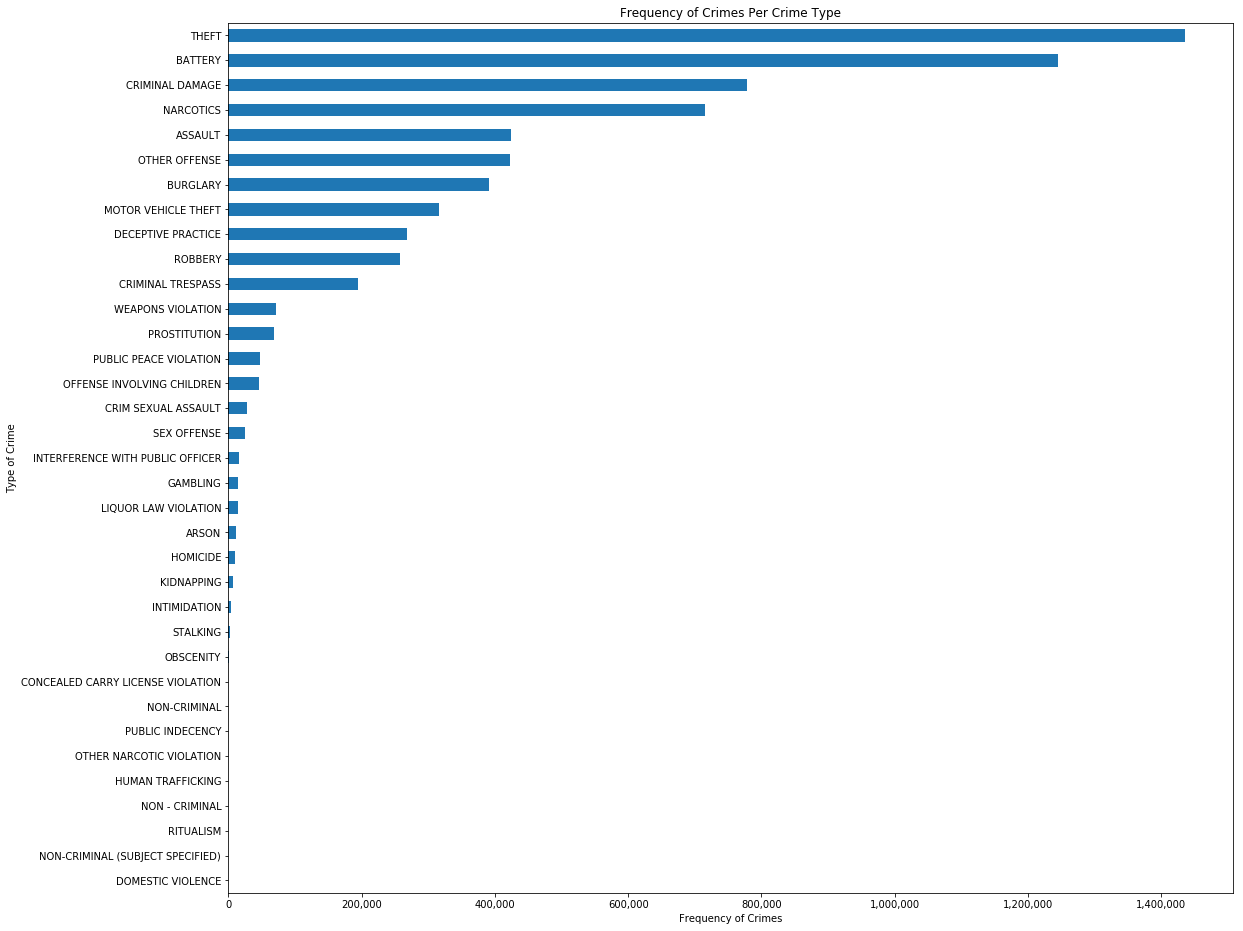

In [8]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/TypeOFCrime.png")


## What year had the most crime?

In [9]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486754
2001    485752
2003    475940
2004    469383
2005    453715
2006    448108
2007    437011
2008    427056
2009    392678
2010    370309
2011    351774
2012    335960
2013    307089
2014    275266
2016    268954
2017    268015
2018    265859
2015    264048
2019     33497
Name: Year, dtype: int64

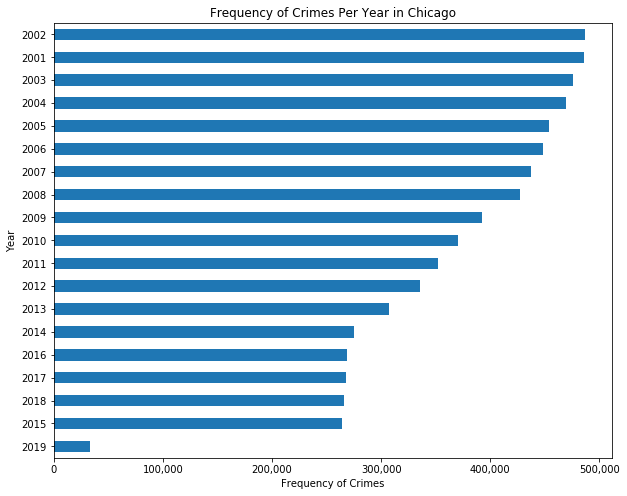

In [11]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerYear.png")

## What percentage of arrests were successful?

In [12]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [13]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    4930863
True     1886305
Name: Arrest, dtype: int64

In [14]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

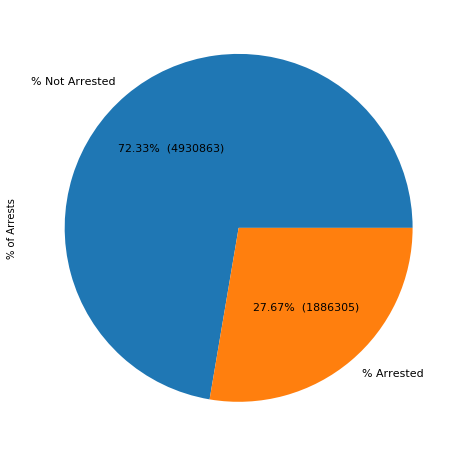

In [15]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))
plt.savefig("output_data/PercentageOfArrests.png")


## What are the successful arrest percentages per year?

In [16]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343850,70.787151
2001,True,141902,29.212849
2002,False,345201,70.918986
2002,True,141553,29.081014
2003,False,334368,70.254234
2003,True,141572,29.745766
2004,False,324697,69.175279
2004,True,144686,30.824721
2005,False,312820,68.946365


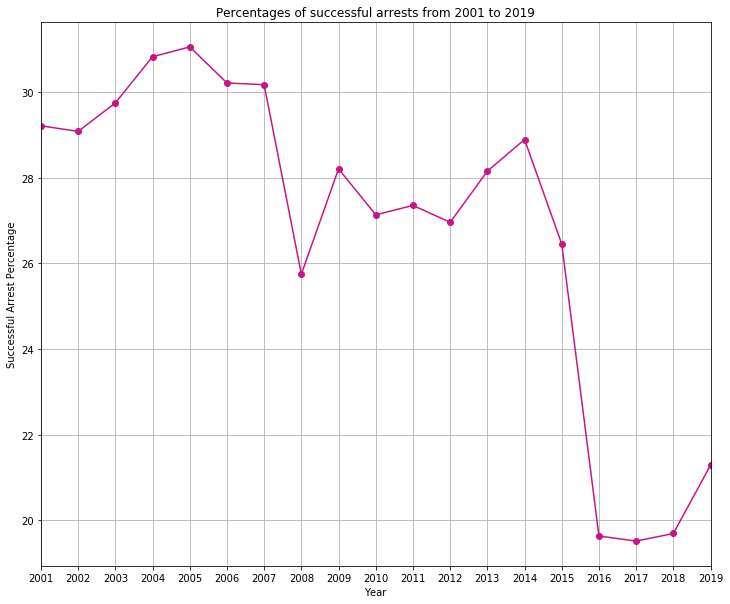

In [17]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2019')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.savefig("output_data/SuccessfulArrest.png")


## Data visualization for crimes commited since this month started

In [18]:
import datetime

## Clean data, create copy, and filter based on this month (March 2019)
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2019, 2, 28)]
print("Number of crimes in Chicago since start of March 2019: %d" % len(cleaned_df))

Number of crimes in Chicago since start of March 2019: 0


## Data visualization for crimes based on district from 2001 to present

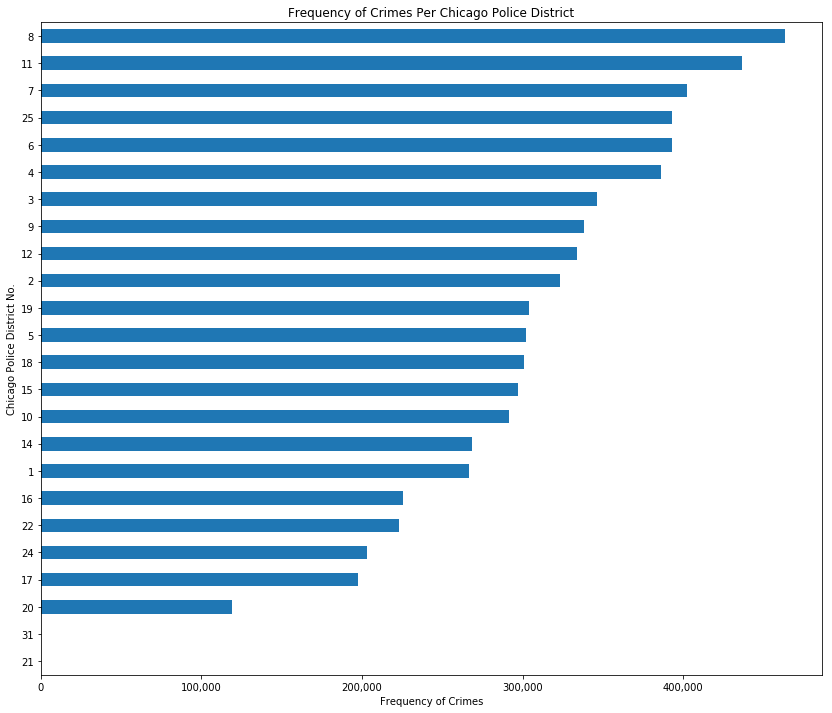

In [19]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerPolisDist.png")


In [20]:
xx=df['Community Area'].value_counts()
xx

25.0    394576
8.0     212323
43.0    202519
23.0    196192
24.0    183313
28.0    182846
67.0    182302
29.0    179115
71.0    175672
49.0    165580
68.0    165567
66.0    153782
69.0    152690
32.0    147347
44.0    133120
22.0    131001
61.0    128329
6.0     122865
27.0    117685
46.0    115556
26.0    115500
19.0    114633
30.0    104518
53.0    101910
42.0    101496
7.0      97211
1.0      95042
3.0      90807
38.0     85878
15.0     79038
         ...  
60.0     39859
41.0     38636
17.0     38138
20.0     37685
5.0      37221
76.0     36989
39.0     35300
48.0     33511
45.0     31711
52.0     30976
54.0     27288
10.0     26374
59.0     25783
50.0     24864
11.0     24547
64.0     24504
62.0     24116
34.0     23010
57.0     22425
72.0     22380
37.0     20901
13.0     20743
18.0     14679
74.0     13946
36.0     13638
55.0     13470
12.0     11143
47.0      9276
9.0       5995
0.0         91
Name: Community Area, Length: 78, dtype: int64